In [1]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np

result  = reviews_all(
    'com.icandesignapp.all',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)

result_1  = reviews_all(
    'com.planner5d.planner5d',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)

result_2  = reviews_all(
    'fr.anuman.HomeDesign3D',
    sleep_milliseconds=0, # defaults to 0
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= 0 # defaults to None(means all score)
)

df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

df_1 = pd.DataFrame(np.array(result_1), columns=['review'])
df_1 = df_1.join(pd.DataFrame(df_1.pop('review').tolist()))

df_2 = pd.DataFrame(np.array(result_2), columns=['review'])
df_2 = df_2.join(pd.DataFrame(df_2.pop('review').tolist()))
 



In [2]:
df = df[['content','score']]
drop_index = df[df['score'] == 3].index
df = df.drop(drop_index)
df['label'] = np.where(df['score'] >=4 , 1, 0)
df = df[['content','label']]

df_1 = df_1[['content','score']]
drop_index_1 = df_1[df_1['score'] == 3].index
df_1 = df_1.drop(drop_index_1)
df_1['label'] = np.where(df_1['score'] >=4 , 1, 0)
df_1 = df_1[['content','label']]

df_2 = df_2[['content','score']]
drop_index_2 = df_2[df_2['score'] == 3].index
df_2 = df_2.drop(drop_index_2)
df_2['label'] = np.where(df_2['score'] >=4 , 1, 0)
df_2 = df_2[['content','label']]


In [3]:
print(len(df)+len(df_1)+len(df_2))

920


In [4]:
tmp_df = pd.concat([df, df_1, df_2], ignore_index=True)

In [5]:
len(tmp_df)

920

In [6]:
tmp_df

,content,label
0,단점: 1. 업데이트 되고 더 어려워진 조작법 2. 시도때도 없는 현질유도 3. 렉...,0
1,"벽 세우는게 간단해서 손가락만 있으면 가능. 단, 프로모드(현질)가 아니라서 정확한...",1
2,안녕하세요~ 이 게임 예전부터 즐겨했는데 괜찮고 문제 없었어요. 가구 진짜 많고 검...,1
3,일단 광고도 안나오고 물건도 다양하고 사용하기도 쉽고 그런데 처음에 들어가면 현질이...,1
4,아 너무 좋아요. 근데 제가 버그하나 제보좀 할게요. 버그 제보하는 방법을 몰라서 ...,1
...,...,...
915,Including everything I've wanted,1
916,유료,0
917,What is it? Are you kidding me? So hard and da...,0
918,안됌,0


In [7]:
tmp_df.to_csv('train.txt', sep='\t')

In [8]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

all_data = read_data('train.txt')

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(all_data, test_size= 0.1, random_state=2000)


In [10]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

829
3
93
3


In [11]:
from konlpy.tag import Okt

okt = Okt()



In [12]:
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
    with open('train_docs.json', encoding='utf-8') as f:
        train_docs = json.load(f)
    with open('test_docs.json', encoding='utf-8') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])

[['나름/Noun', '만족/Noun', '중/Suffix'], '1']


In [13]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

5987


In [14]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

5987
1442
[('하다/Verb', 222),
 ('좋다/Adjective', 177),
 ('./Punctuation', 170),
 ('이/Josa', 104),
 ('가/Josa', 91),
 ('있다/Adjective', 88),
 ('도/Josa', 74),
 ('을/Josa', 73),
 ('너무/Adverb', 65),
 ('에/Josa', 64)]


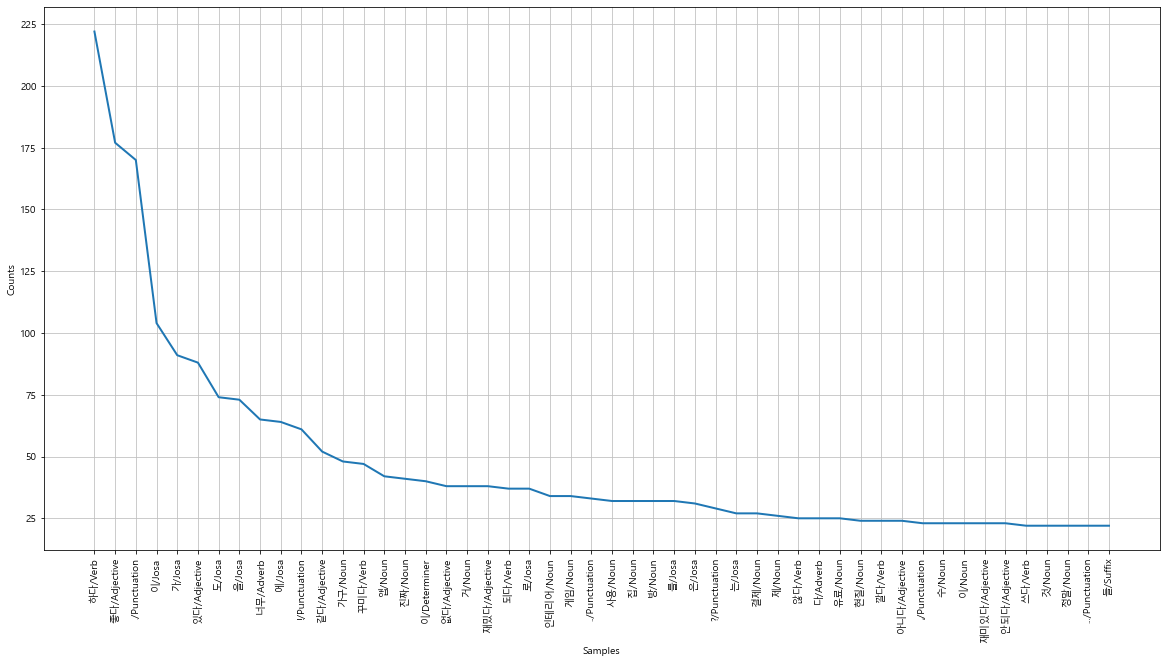

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [27]:
# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
selected_words = [f[0] for f in text.vocab().most_common(100)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [28]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(100,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=512)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))
results = model.evaluate(x_test, y_test)

C:\Users\HP\miniconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 273ms/step - loss: 0.6801 - accuracy: 0.5427
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6531 - accuracy: 0.7161
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6350 - accuracy: 0.7161
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6199 - accuracy: 0.7186
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.7211
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.7261
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5809 - accuracy: 0.7286
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5688 - accuracy: 0.7312
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7387
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5451 - accuracy: 0.7462
Epoch 11/100
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.1114 - accuracy: 0.9698
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9698
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1080 - accuracy: 0.9724
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9724
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1048 - accuracy: 0.9724
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9749
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9724
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9749
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9774
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9774
Epoch 94/100
1/1 [===============

13/13 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9799 - val_loss: 2.4635 - val_accuracy: 0.8000
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9799 - val_loss: 2.4391 - val_accuracy: 0.8000
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9799 - val_loss: 2.4993 - val_accuracy: 0.8000
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 2.4337 - val_accuracy: 0.8000
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9799 - val_loss: 2.4612 - val_accuracy: 0.8000
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 2.6310 - val_accuracy: 0.8000
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9799 - val_loss: 2.6219 - val_accuracy: 0.8000
Epoch 54/100
13/13 

In [34]:
 model.save('review_pos_neg_predict.h5')

In [35]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 4.5708 - accuracy: 0.8000


[4.57081413269043, 0.800000011920929]

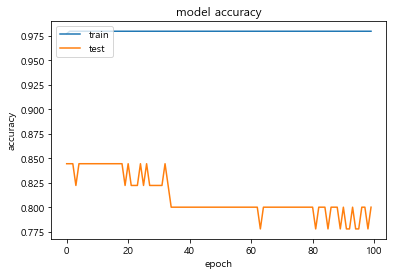

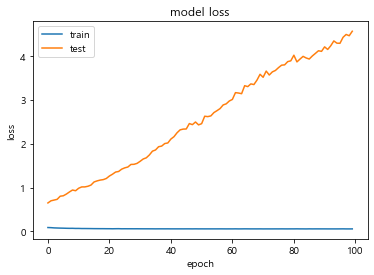

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))

In [28]:
predict_pos_neg("어플이 너무 좋은것 같습니다")
predict_pos_neg('결제 유도가 너무 심합니다')

[어플이 너무 좋은것 같습니다]는 99.02% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[결제 유도가 너무 심합니다]는 88.57% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;

